#**Unpickling the Data**

In [13]:
from google.colab import drive
drive.mount("/content/drive")
!ls "drive/Shared drives/PMDL Project"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Data Preprocessing.ipynb'		     'Old Notebooks'
 Datasets				     'Pickles of the Final Models '
'Individual Program Brief Template.gslides'  'Project Wireframes.gslides'
 LSTM_with_exclamaition.pickle		     'Spam filter 2.zip'
 Models					     'Spam Filter.zip'


In [2]:
import pickle
import keras
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate

In [3]:
dataset_dir = "drive/Shared drives/PMDL Project/Datasets"

pickle_off_x_tr = open(dataset_dir + "/train_padded.pickle","rb")
train_padded = pickle.load(pickle_off_x_tr)

pickle_off_y_tr = open(dataset_dir + "/train_labels.pickle","rb")
train_labels = pickle.load(pickle_off_y_tr)

pickle_off_x_test = open(dataset_dir + "/test_padded.pickle","rb")
test_padded = pickle.load(pickle_off_x_test)

pickle_off_y_test = open(dataset_dir + "/test_labels.pickle","rb")
test_labels = pickle.load(pickle_off_y_test)

pickle_off_website_tr = open(dataset_dir + "/train_website.pickle","rb")
website_train = pickle.load(pickle_off_website_tr)

pickle_off_website_test = open(dataset_dir + "/test_website.pickle","rb")
website_test = pickle.load(pickle_off_website_test)

pickle_off_ex_train = open(dataset_dir + "/train_ex.pickle","rb")
ex_train = pickle.load(pickle_off_ex_train)

pickle_off_ex_test = open(dataset_dir + "/test_ex.pickle","rb")
ex_test = pickle.load(pickle_off_ex_test)

#**Testing the website feature**

In [4]:
def train_and_vizualize_model(model, epochs_num):
  history = model.fit(
    [train_padded, website_train], train_labels, batch_size=32, epochs=epochs_num, validation_data=([test_padded, website_test], test_labels),
)
  x = range(1,epochs_num + 1)
  plt.plot(x, history.history['loss'], 'r', label='Training Loss')
  plt.plot(x,history.history['val_loss'], 'b', label='Validation Loss')

  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

In [6]:
inputA = Input(shape=(train_padded.shape[1],))
inputB = Input(shape=(1,))

x = Embedding(564273, 128)(inputA)
x = Conv1D(8, 10, padding = 'valid' , activation = 'relu', strides = 1)(x)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalMaxPooling1D()(x)
x = Model(inputs=inputA, outputs=x)

combined = concatenate([x.output, inputB])

z = Dense(64, activation="relu")(combined)
z = Dropout(0.7)(z)
z = Dense(1, activation="sigmoid")(z)
model = Model(inputs=[x.input, inputB], outputs=z)

In [10]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 128)     72226944    ['input_3[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 91, 8)        10248       ['embedding_1[0][0]']            
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 45, 8)        0           ['conv1d[0][0]']                 
                                                                                            

In [8]:
model.compile(loss='categorical_hinge',
              optimizer='Adamax',
              metrics=['accuracy'])

Epoch 1/30
149/149 [==============================] - 6s 34ms/step - loss: 1.0256 - accuracy: 0.6209 - val_loss: 0.9181 - val_accuracy: 0.5997
Epoch 2/30
149/149 [==============================] - 5s 33ms/step - loss: 0.9495 - accuracy: 0.7404 - val_loss: 0.7853 - val_accuracy: 0.8385
Epoch 3/30
149/149 [==============================] - 5s 33ms/step - loss: 0.7667 - accuracy: 0.8841 - val_loss: 0.6243 - val_accuracy: 0.8831
Epoch 4/30
149/149 [==============================] - 5s 33ms/step - loss: 0.6623 - accuracy: 0.9331 - val_loss: 0.5700 - val_accuracy: 0.9083
Epoch 5/30
149/149 [==============================] - 5s 34ms/step - loss: 0.6187 - accuracy: 0.9583 - val_loss: 0.5480 - val_accuracy: 0.9235
Epoch 6/30
149/149 [==============================] - 5s 33ms/step - loss: 0.5989 - accuracy: 0.9668 - val_loss: 0.5320 - val_accuracy: 0.9319
Epoch 7/30
149/149 [==============================] - 5s 33ms/step - loss: 0.5834 - accuracy: 0.9760 - val_loss: 0.5252 - val_accuracy: 0.9369

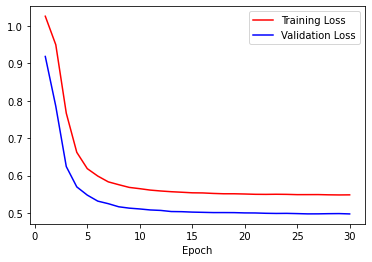

In [9]:
train_and_vizualize_model(model, 30)

In [11]:
score = model.evaluate([test_padded, website_test], test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.49781838059425354
Test accuracy: 0.9545837044715881


In [12]:
models_dir = "drive/Shared drives/PMDL Project/Models"
pickle_CNN = open(models_dir + "/CNN_with_websites.pickle","wb")
pickle.dump(model, pickle_CNN)
pickle_CNN.close()

INFO:tensorflow:Assets written to: ram://347dd53e-00cb-457c-9604-61d6f7b0886b/assets


#**Testing the exclamation feature**

In [14]:
def train_and_vizualize_model(model, epochs_num):
  history = model.fit(
    [train_padded, ex_train], train_labels, batch_size=32, epochs=epochs_num, validation_data=([test_padded, ex_test], test_labels),
)
  x = range(1,epochs_num + 1)
  plt.plot(x, history.history['loss'], 'r', label='Training Loss')
  plt.plot(x,history.history['val_loss'], 'b', label='Validation Loss')

  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

In [15]:
inputA = Input(shape=(train_padded.shape[1],))
inputB = Input(shape=(1,))

x = Embedding(564273, 128)(inputA)
x = Conv1D(8, 10, padding = 'valid' , activation = 'relu', strides = 1)(x)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalMaxPooling1D()(x)
x = Model(inputs=inputA, outputs=x)

combined = concatenate([x.output, inputB])

z = Dense(64, activation="relu")(combined)
z = Dropout(0.7)(z)
z = Dense(1, activation="sigmoid")(z)
model = Model(inputs=[x.input, inputB], outputs=z)

In [16]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 100, 128)     72226944    ['input_5[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 91, 8)        10248       ['embedding_2[0][0]']            
                                                                                                  
 max_pooling1d_1 (MaxPooling1D)  (None, 45, 8)       0           ['conv1d_1[0][0]']               
                                                                                            

In [17]:
model.compile(loss='categorical_hinge',
              optimizer='Adamax',
              metrics=['accuracy'])

Epoch 1/30
149/149 [==============================] - 7s 38ms/step - loss: 1.0098 - accuracy: 0.6524 - val_loss: 0.8787 - val_accuracy: 0.6703
Epoch 2/30
149/149 [==============================] - 6s 40ms/step - loss: 0.8961 - accuracy: 0.7644 - val_loss: 0.7335 - val_accuracy: 0.8167
Epoch 3/30
149/149 [==============================] - 5s 33ms/step - loss: 0.7236 - accuracy: 0.8963 - val_loss: 0.5962 - val_accuracy: 0.9066
Epoch 4/30
149/149 [==============================] - 5s 33ms/step - loss: 0.6413 - accuracy: 0.9424 - val_loss: 0.5531 - val_accuracy: 0.9251
Epoch 5/30
149/149 [==============================] - 5s 33ms/step - loss: 0.6074 - accuracy: 0.9604 - val_loss: 0.5361 - val_accuracy: 0.9352
Epoch 6/30
149/149 [==============================] - 5s 33ms/step - loss: 0.5944 - accuracy: 0.9647 - val_loss: 0.5245 - val_accuracy: 0.9394
Epoch 7/30
149/149 [==============================] - 5s 33ms/step - loss: 0.5836 - accuracy: 0.9726 - val_loss: 0.5215 - val_accuracy: 0.9403

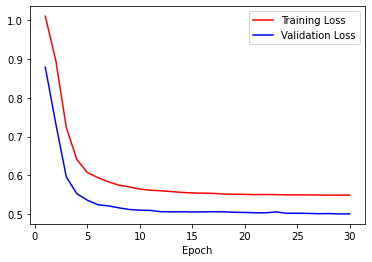

In [18]:
train_and_vizualize_model(model, 30)

In [19]:
score = model.evaluate([test_padded, ex_test], test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.500859797000885
Test accuracy: 0.9537426233291626


In [20]:
models_dir = "drive/Shared drives/PMDL Project/Models"
pickle_CNN= open(models_dir + "/CNN_with_exlaimation.pickle","wb")
pickle.dump(model, pickle_CNN)
pickle_CNN.close()

INFO:tensorflow:Assets written to: ram://3b38239d-2eed-4e28-8025-95cae3d3ca13/assets
